## 2.二次元配列と勾配問題


機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。

この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。


## 【問題1】1次関数
$x$ が-50から50の範囲で次の式を考えます。

$$
  \begin{equation*}
    y = \frac{1}{2}x + 1 \\
  \end{equation*}
$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1次関数を作成
def func1(x):
    y = (1/2) * x + 1
    return y

In [3]:
# xの範囲を指定
x_min = -50
x_max = 50
interval = 0.1

# xの範囲での整数のndarrayを作成
x_ndarray = np.arange(x_min, x_max + interval, interval)

# yの値を返却
y_ndarray = func1(x_ndarray)
y_ndarray

array([-24.  , -23.95, -23.9 , ...,  25.9 ,  25.95,  26.  ])

## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [4]:
# x_ndarray, y_ndarray の形状を確認
print('x :', x_ndarray.shape)
print('y :', y_ndarray.shape)

# 2次元配列に変換
x_ndarray = x_ndarray.reshape(1001, 1)
y_ndarray = y_ndarray.reshape(1001, 1)

# 配列を結合
xy_ndarray = np.concatenate([x_ndarray, y_ndarray], axis=1)
print(xy_ndarray)

x : (1001,)
y : (1001,)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [5]:
# yの変化量を求める関数
def slope(value_ndarray):
    diff = value_ndarray[1:] - value_ndarray[:-1]
    d_y = diff[:, 1] / diff[:, 0]
    return d_y

# yの変化量を取得
y_change = slope(xy_ndarray)

# 今回は1次関数のため、変化量y_changeは一定。そのため任意のx(x=0)における変化量を出力。
print('yの変化量：{}'.format(y_change[0]))

yの変化量：0.5


## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。

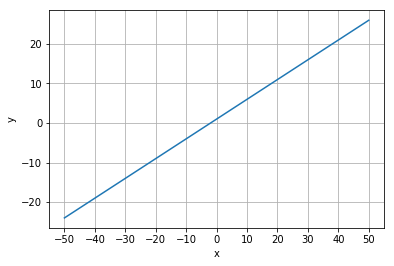

In [6]:
plt.plot(xy_ndarray[:, 0], xy_ndarray[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(list(range(-50, 51, 10)))

plt.grid(True)
plt.show()

また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

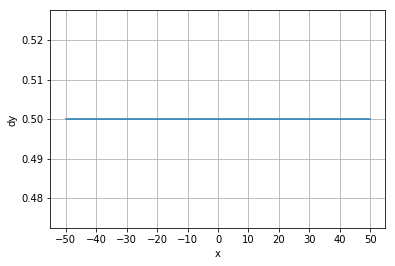

In [7]:
plt.plot(x_ndarray[:1000], y_change)
plt.xlabel('x')
plt.ylabel('dy')
plt.xticks(list(range(-50, 51, 10)))
plt.grid(True)
plt.show()

## 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。

そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$
  \begin{equation*}
    y = x^2 \quad (-50 \leq x \leq 50) \\
    y = 2x^2 + 2^x \quad (-50 \leq x \leq 50) \\
    y = sin(x^{\frac{1}{2}}) \quad (0 \leq x \leq 50) \\ 
  \end{equation*}
$$



また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

**<<雛形>>**

In [8]:
def compute_gradient(function, x_range=(-50, 50, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    # xの範囲を取得
    x_min = x_range[0]
    x_max = x_range[1]
    interval = x_range[2]
    
    # xの範囲での整数のndarrayを作成
    x_ndarray = np.arange(x_min, x_max + interval, interval)
    
    # yの値を返却
    y_ndarray = function(x_ndarray)
    
    # x, yの値の数を取得
    x_n = len(x_ndarray)
    y_n = len(y_ndarray)
    
    # 2次元配列に変換
    x_ndarray = x_ndarray.reshape(x_n, 1)
    y_ndarray = y_ndarray.reshape(y_n, 1)
    
    # 配列を結合
    xy_ndarray = np.concatenate([x_ndarray, y_ndarray], axis=1)
    
    # yの変化量を計算
    diff = xy_ndarray[1:] - xy_ndarray[:-1]
    gradient = diff[:, 1] / diff[:, 0]
    
    return xy_ndarray, gradient


array_xy, gradient = compute_gradient(func1)
print(array_xy)
print(gradient)
print(len(gradient))

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5

In [9]:
# グラフ表示のための関数
def graph(ndarray_xy, d_y_list, x_range=(-50, 50, 0.1)):
    # xの範囲を取得
    x_min = x_range[0]
    x_max = x_range[1]
    interval = x_range[2]
    
    # グラフ描写
    plt.plot(ndarray_xy[:, 0], ndarray_xy[:, 1], label='function')
    plt.plot(np.arange(x_min, x_max, interval), d_y_list, label='differential')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xticks(list(range(x_min, x_max+10, 10)))
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

$$
  \begin{equation*}
    y = x^2 \quad (-50 \leq x \leq 50) \\
  \end{equation*}
$$


[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 ...
 [  49.8  2480.04]
 [  49.9  2490.01]
 [  50.   2500.  ]]
[-99.9 -99.7 -99.5 -99.3 -99.1 -98.9 -98.7 -98.5 -98.3 -98.1 -97.9 -97.7
 -97.5 -97.3 -97.1 -96.9 -96.7 -96.5 -96.3 -96.1 -95.9 -95.7 -95.5 -95.3
 -95.1 -94.9 -94.7 -94.5 -94.3 -94.1 -93.9 -93.7 -93.5 -93.3 -93.1 -92.9
 -92.7 -92.5 -92.3 -92.1 -91.9 -91.7 -91.5 -91.3 -91.1 -90.9 -90.7 -90.5
 -90.3 -90.1 -89.9 -89.7 -89.5 -89.3 -89.1 -88.9 -88.7 -88.5 -88.3 -88.1
 -87.9 -87.7 -87.5 -87.3 -87.1 -86.9 -86.7 -86.5 -86.3 -86.1 -85.9 -85.7
 -85.5 -85.3 -85.1 -84.9 -84.7 -84.5 -84.3 -84.1 -83.9 -83.7 -83.5 -83.3
 -83.1 -82.9 -82.7 -82.5 -82.3 -82.1 -81.9 -81.7 -81.5 -81.3 -81.1 -80.9
 -80.7 -80.5 -80.3 -80.1 -79.9 -79.7 -79.5 -79.3 -79.1 -78.9 -78.7 -78.5
 -78.3 -78.1 -77.9 -77.7 -77.5 -77.3 -77.1 -76.9 -76.7 -76.5 -76.3 -76.1
 -75.9 -75.7 -75.5 -75.3 -75.1 -74.9 -74.7 -74.5 -74.3 -74.1 -73.9 -73.7
 -73.5 -73.3 -73.1 -72.9 -72.7 -72.5 -72.3 -72.1 -71.9 -71.7 -71.5 -71.3
 -71

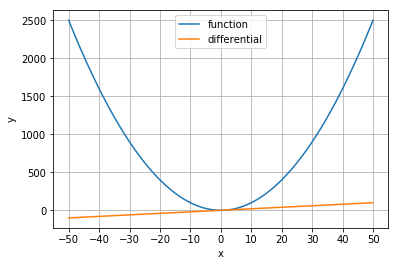

In [10]:
def func2(x):
    y = x**2
    return y

a1, a2 = compute_gradient(func2)
print(a1)
print(a2)

graph(a1, a2)

$$
  \begin{equation*}
    y = 2x^2 + 2^x \quad (-50 \leq x \leq 50) \\
  \end{equation*}
$$

[[-5.00000000e+01  5.00000000e+03]
 [-4.99000000e+01  4.98002000e+03]
 [-4.98000000e+01  4.96008000e+03]
 ...
 [ 4.98000000e+01  9.80152798e+14]
 [ 4.99000000e+01  1.05050176e+15]
 [ 5.00000000e+01  1.12589991e+15]]
[-1.99800000e+02 -1.99400000e+02 -1.99000000e+02 -1.98600000e+02
 -1.98200000e+02 -1.97800000e+02 -1.97400000e+02 -1.97000000e+02
 -1.96600000e+02 -1.96200000e+02 -1.95800000e+02 -1.95400000e+02
 -1.95000000e+02 -1.94600000e+02 -1.94200000e+02 -1.93800000e+02
 -1.93400000e+02 -1.93000000e+02 -1.92600000e+02 -1.92200000e+02
 -1.91800000e+02 -1.91400000e+02 -1.91000000e+02 -1.90600000e+02
 -1.90200000e+02 -1.89800000e+02 -1.89400000e+02 -1.89000000e+02
 -1.88600000e+02 -1.88200000e+02 -1.87800000e+02 -1.87400000e+02
 -1.87000000e+02 -1.86600000e+02 -1.86200000e+02 -1.85800000e+02
 -1.85400000e+02 -1.85000000e+02 -1.84600000e+02 -1.84200000e+02
 -1.83800000e+02 -1.83400000e+02 -1.83000000e+02 -1.82600000e+02
 -1.82200000e+02 -1.81800000e+02 -1.81400000e+02 -1.81000000e+02
 -1.

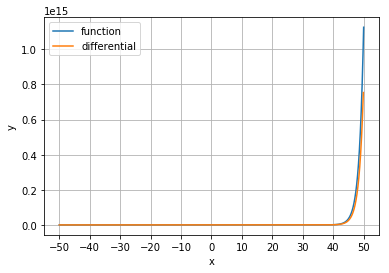

In [11]:
def func3(x):
    y = 2 * x**2 + 2**x
    return y

b1, b2 = compute_gradient(func3)
print(b1)
print(b2)

graph(b1, b2)

In [12]:
b1[490:510,:]

array([[-1.00000000e+00,  2.50000000e+00],
       [-9.00000000e-01,  2.15588673e+00],
       [-8.00000000e-01,  1.85434918e+00],
       [-7.00000000e-01,  1.59557221e+00],
       [-6.00000000e-01,  1.37975396e+00],
       [-5.00000000e-01,  1.20710678e+00],
       [-4.00000000e-01,  1.07785828e+00],
       [-3.00000000e-01,  9.92252396e-01],
       [-2.00000000e-01,  9.50550563e-01],
       [-1.00000000e-01,  9.53032992e-01],
       [ 7.10542736e-13,  1.00000000e+00],
       [ 1.00000000e-01,  1.09177346e+00],
       [ 2.00000000e-01,  1.22869835e+00],
       [ 3.00000000e-01,  1.41114441e+00],
       [ 4.00000000e-01,  1.63950791e+00],
       [ 5.00000000e-01,  1.91421356e+00],
       [ 6.00000000e-01,  2.23571657e+00],
       [ 7.00000000e-01,  2.60450479e+00],
       [ 8.00000000e-01,  3.02110113e+00],
       [ 9.00000000e-01,  3.48606598e+00]])


$$
  \begin{equation*}
    y = sin(x^{\frac{1}{2}}) \quad (0 \leq x \leq 50) \\ 
  \end{equation*}
$$


[[ 0.          0.        ]
 [ 0.1         0.31098359]
 [ 0.2         0.43245484]
 ...
 [49.8         0.69880548]
 [49.9         0.70385354]
 [50.          0.70886129]]
[ 3.10983593e+00  1.21471246e+00  8.82894606e-01  7.03828177e-01
  5.85098219e-01  4.97909314e-01  4.29817921e-01  3.74409878e-01
  3.27982463e-01  2.88220882e-01  2.53589429e-01  2.23021164e-01
  1.95746946e-01  1.71195280e-01  1.48930670e-01  1.28614067e-01
  1.09976607e-01  9.28016447e-02  7.69121494e-02  6.21616541e-02
  4.84276337e-02  3.56065709e-02  2.36102232e-02  1.23627575e-02
  1.79852267e-03 -8.13970144e-03 -1.75020966e-02 -2.63329234e-02
 -3.46714259e-02 -4.25525706e-02 -5.00076542e-02 -5.70648075e-02
 -6.37494153e-02 -7.00844696e-02 -7.60908669e-02 -8.17876614e-02
 -8.71922805e-02 -9.23207097e-02 -9.71876518e-02 -1.01806665e-01
 -1.06190281e-01 -1.10350114e-01 -1.14296943e-01 -1.18040803e-01
 -1.21591046e-01 -1.24956409e-01 -1.28145068e-01 -1.31164685e-01
 -1.34022457e-01 -1.36725148e-01 -1.39279130e-01 -1.

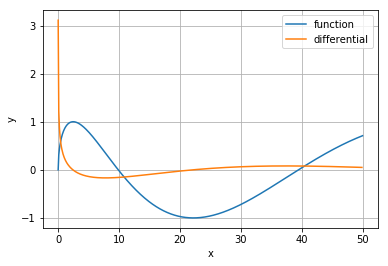

In [13]:
def func4(x):
    y = np.sin(x**(1/2))
    return y

c1, c2 = compute_gradient(func4, (0, 50, 0.1))
print(c1)
print(c2)

graph(c1, c2, (0, 50, 0.1))

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

In [14]:
# 問題の内容を表示するための関数用意
def func_min(func, x_range=(-50, 50, 0.1)):
    d1, d2 = compute_gradient(func, x_range)
    d1_y_min = np.min(d1[:, 1])
    d1_y_min_idx = np.argmin(d1[:, 1])

    print('最小値は、x={:.3}のとき、y={}'.format(d1[d1_y_min_idx, 0], d1_y_min))
    print('前後の勾配は')
    print('  x={:.3}のとき、y={:.3}'.format(d1[d1_y_min_idx-1, 0], d2[d1_y_min_idx]))
    print('  x={:.3}のとき、y={:.3}'.format(d1[d1_y_min_idx+1, 0], d2[d1_y_min_idx]))

In [15]:
# func2の表示
func_min(func2)

最小値は、x=7.11e-13のとき、y=5.048709793414476e-25
前後の勾配は
  x=-0.1のとき、y=0.1
  x=0.1のとき、y=0.1


In [16]:
# func3の表示
func_min(func3)

最小値は、x=-0.2のとき、y=0.9505505632959851
前後の勾配は
  x=-0.3のとき、y=0.0248
  x=-0.1のとき、y=0.0248


In [17]:
# func4の表示
func_min(func4, (0, 50, 0.1))

最小値は、x=22.2のとき、y=-0.9999997540298113
前後の勾配は
  x=22.1のとき、y=0.000487
  x=22.3のとき、y=0.000487
